In [1]:
from google.colab import files
uploaded = files.upload()


Saving IRIS.csv to IRIS.csv


In [2]:
import os
os.listdir()


['.config', 'IRIS.csv', 'sample_data']

In [4]:
import pandas as pd

df = pd.read_csv('IRIS.csv')   # use exact file name
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.iloc[:, :-1]   # all columns except species
y = df.iloc[:, -1]    # species column


In [8]:
X = df.drop("species", axis=1)
y = df["species"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [11]:
y_pred = model.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



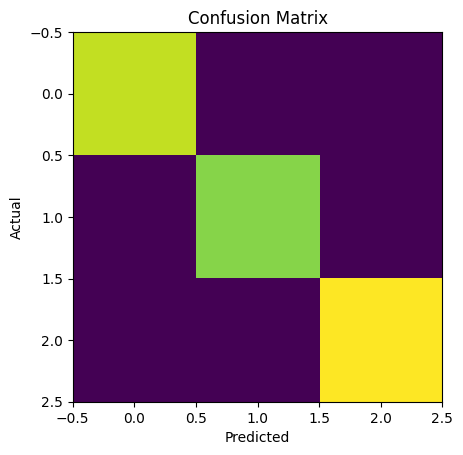

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


it's optional


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 1.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN Accuracy:", knn.score(X_test, y_test))


KNN Accuracy: 1.0


In [17]:
import pandas as pd

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False)


,0
petal length (cm),0.439994
petal width (cm),0.421522
sepal length (cm),0.108098
sepal width (cm),0.030387


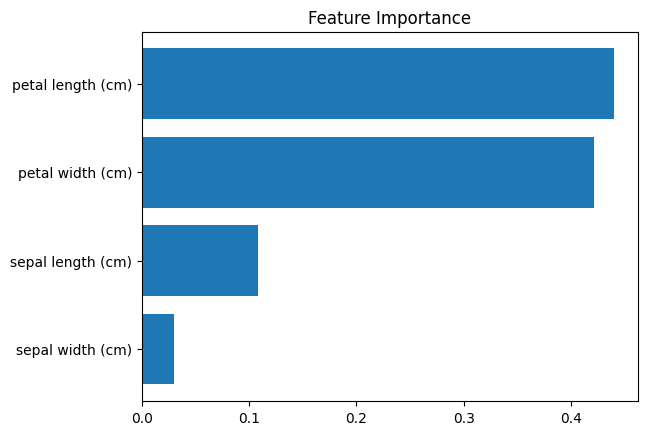

In [18]:
import matplotlib.pyplot as plt

importance = importance.sort_values()

plt.figure()
plt.barh(importance.index, importance.values)
plt.title("Feature Importance")
plt.show()


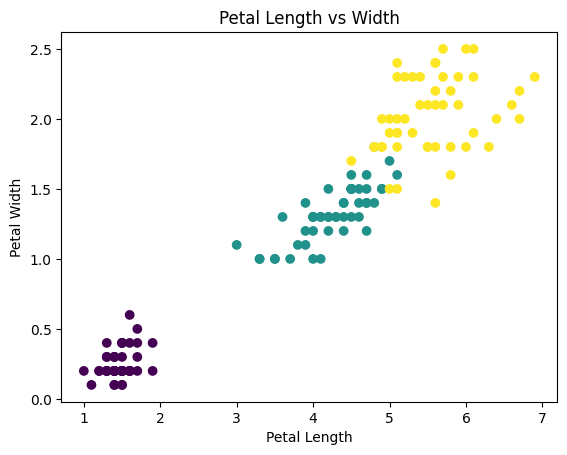

In [19]:
plt.figure()
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Width")
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())


Cross Validation Accuracy: 0.9666666666666668


now save the model


In [21]:
import joblib
joblib.dump(rf, "iris_model.pkl")


['iris_model.pkl']